# Python

[Centrale Lille, G3 SDIA | M1 DS, University of Lille]

---

## Lab 5 - data visualization with seaborn, parallel Markov chains with multiprocessing and dask

---


## Guidelines (read carefully before starting)


**Objectives**: acquire further practice with a few parallelisation techniques in Python (`multiprocessing`, `dask`).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the `.zip` archive in a local folder (Computer -> Documents/Python/);
- unzip the archive `.zip`;
- rename the folder with the convention `lab5_Name1_Name2`;
- duplicate the notebook file and rename it `lab5_Name1_Name2.ipynb`;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab5` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab5 --file=requirement.txt --channel conda-forge
    conda activate lab5
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab5
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab5`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; global grade from F to A (A+)

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. Any code produced should be commented whenever appropriate, custom functions and objects documented and unit-tested (see session 1). Figure produced should be clearly annotated (axis, title, legend whenever appropriate).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Unit-tests developed whenever appropriate (correctness, relevance)
4. Answers to the questions and overall presentation of the Jupyter notebook.

**Useful references for this lab**:

[1] `seaborn`: [official tutorial](https://seaborn.pydata.org/tutorial.html)

[2] `multiprocessing`: [documentation](https://docs.python.org/3/library/multiprocessing.html), [doc2](https://he-arc.github.io/livre-python/multiprocessing/index.html)

[3] `dask`: [documentation](http://numba.pydata.org/) 

## <a name="content">Contents</a>
- [Exercise 1: seaborn, a useful tool for data visualisation](#ex1)
- [Exercise 2: Simulating a discrete-time homogeneous Markov chain](#ex2)
- [Bonus: Parallel computing with Dask](#bonus)
---

In [1]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: seaborn, a useful tool for data visualisation</a> [(&#8593;)](#content)
 
The `seaborn` package can significantly enhance data and data analysis visualization. See the [tutorial page](https://seaborn.pydata.org/tutorial.html) for examples of effective predefined graphics. An example aimed at visualizing the empirical distributions of 9 realizations of a bivariate Gaussian random vector is reported below.

/tmp/ipykernel_43306/4086994482.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
/tmp/ipykernel_43306/4086994482.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
/tmp/ipykernel_43306/4086994482.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
/tmp/ipykernel_43306/4086994482.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, sh

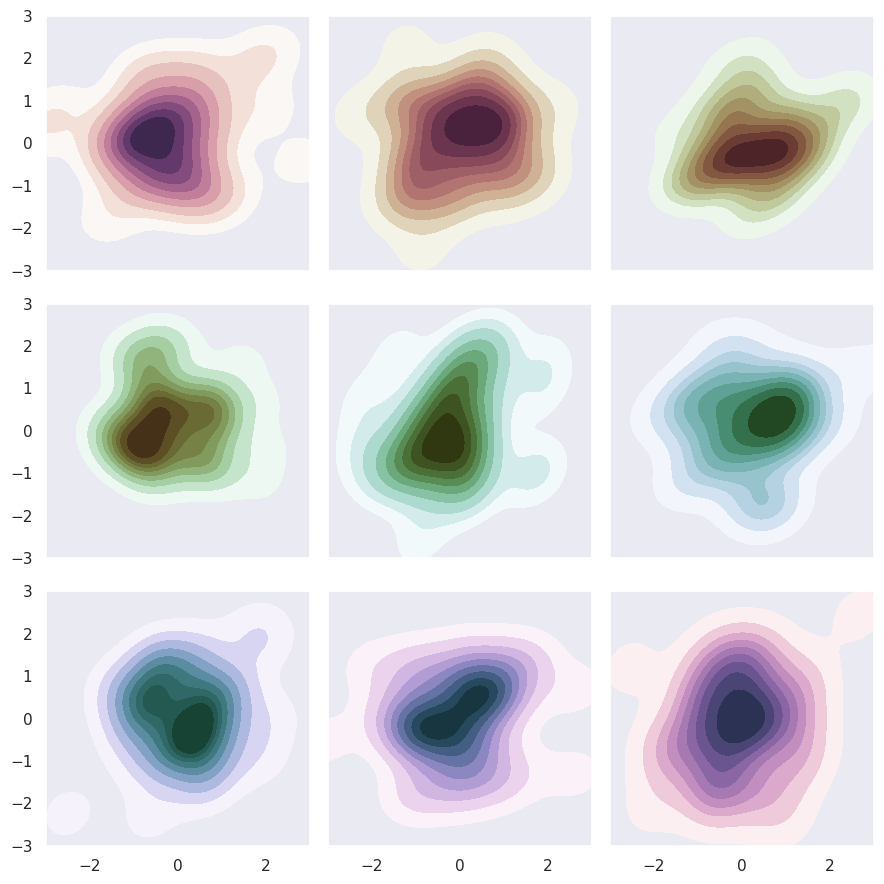

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="dark")
rng = np.random.default_rng(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rng.normal(size=(2, 50))

    sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

1. Comment on the lines of codes related to the `seaborn` library to make their role explicit. More specifically comment on the KDE method.

Your answers(s)

In [ ]:
# Create a cubehelix colormap to use with kdeplot
#This produces a colormap with linearly-decreasing (or increasing) brightness.
cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. 
#KDE represents the data using a continuous probability density curve in one or more dimensions.
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)


2. For one of the realizations, take a look at the documentation of [`sns.jointplot`](https://seaborn.pydata.org/examples/joint_kde.html) to display both the 2-D empirical distribution of the data, and 1D histograms of their distribution along each axis. 

Your answers(s)

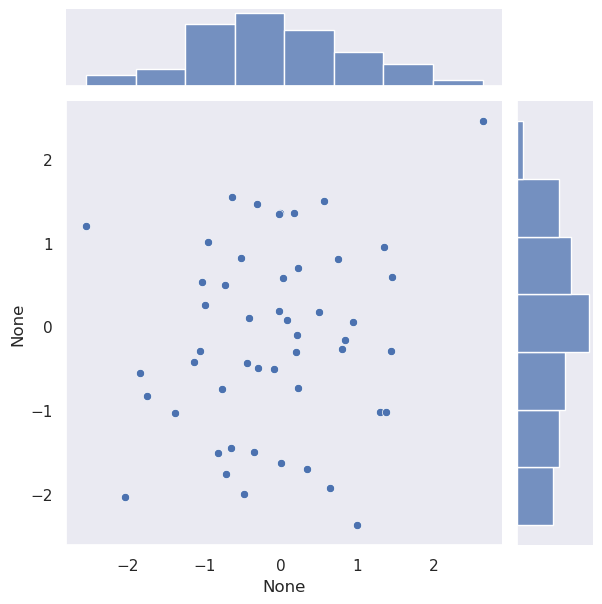

In [340]:
sns.jointplot(x=x,y=y)

## <a name="ex2">Exercise 2: Simulating a discrete-time homogeneous Markov chain.</a> [(&#8593;)](#content)


Let ${(X_n)}_{n\geq 0}$ be a discrete-time homogeneous Markov chain with values over a finite ensemble $E=\{x_1,\dots,x_N\}$ identified to $\{1,\dots,N\}$. Consider $\boldsymbol{\rho} \in \Delta_N$, where $\Delta_N = \{\mathbf{x}\in\mathbb{R}^N \mid x_n \geq 0 \, \forall n \in \{1,\dotsc,N\} \text{ and } \sum_n x_n = 1 \}$ is the unit simplex in $\mathbb{R}^N$.

In the following, we consider the initial state of the chain $X_0$, following the discrete probability distribution:

$$
    \mathbb{P}(X_0 = k) = \rho_k, \qquad k \in \{1, \dots,  N\}.
$$
  
Let $\mathbf{A} = [a_{i,j}]_{i,j} \in \mathbb{R}^{N \times N}$ be the transition matrix of the chain, i.e.,

\begin{align*}
    &a_{i,j} = \mathbb{P}(X_{n+1} = j \mid X_{n} = i) \geq 0, \, \forall n \geq 0, \\
    &(\forall i \in \{1, \dotsc, N\}), \quad \sum_{j=1}^N a_{i,j} = 1.
\end{align*}
 
The chain is said to be homogeneous in that $\mathbf{A}$ does not depend from the time index $n$. Let $\tilde{a}_n$ represent the $n$ th row of $\mathbf{A}$. 

The trajectory of the chain can be simulated as follows:

>- Draw the discrete random variable $X_0$ with distribution $\boldsymbol{\rho}$;
>
>- For $q = 0$ to $n_{\text{iter}}-1$
>    - Draw the discrete random variable $X_{q+1}$ with distribution $\tilde{a}_{X_{q}}$;
>    
>- Return ${(X_q)}_{0 \leq q \leq n_{\text{iter}}}$.


<!-- If $X_n = k$, we know that $T$, the life time of the chain in the state $k$ obeys a geometric distribution with parameter $a_{kk}$. We also know that the probability of transition from k to $\ell\neq k$ is given by:

$$
    \mathbb{P}(X_{n+1}=\ell | X_n=k, \ell\neq k) = \frac{a_{k\ell}}{1-a_{kk}}.
$$

 ### One possible algorithm to simulate a Markov chain is therefore:

    a. generate the initial state $X_0$ according to the discrete law $\{\rho_1,\dots,\rho_N\}$.

    b. at instant $n$, knowing that $X_n=k$,

    i) determine the life time $T$ in state $X_n=k$ by simulating a geometrical variable with parameter $a_{kk}$. As a consequence $X_n = \dots = X_{n+T} = k$. When $T=0$, we simply still have $X_n=k$.

    ii) determine next transition instant $n+T$, and determine the next state by using the probabilities of transition. -->

1. Implement the above algorithm in a function `X = markov(rho,A,nmax,rng)` with:
     - `rho`: law of the initial state (nonnegative vector of size $N$, summing to 1),
     - `A`: transition matrix (of size $N\times N$),
     - `nmax`: number of time steps,
     - `rng`: random number generator
     - `X`: trajectory of the chain.
     
In particular, check the input parameters `A` and `rho` make sense by adding appropriate assertions (or raising exceptions).

> Hint: the function `np.random.choice` can be useful to draw discrete random variables.

Your answers(s)

In [ ]:
from numpy.testing import assert_allclose, assert_approx_equal

def markov(rho:np.ndarray, A, nmax, rng):
    # Checks if rho contains as many elements as A
    assert(rho.shape[0]==A.shape[0])
    # Check that the transition matrix is a square matrix
    assert(A.shape[0]==A.shape[1])
    # Checks if the sums of the columns of A is equal to 1
    assert_allclose(np.sum(A,axis=1),np.ones(A.shape[0],dtype=np.float64))
    # Checks that the sum of the law of the initial state is equal to 1
    assert_approx_equal(rho.sum(),1.0)
    size=rho.shape[0]
    #Drawing the initial discrete random variable using the law of the initial state (rho)
    X0 = rng.choice(np.arange(1,size+1,dtype=int), p=rho)
    X = np.zeros(nmax,dtype=int)
    X[0]=X0 
    for q in range(1, nmax):
        Xqminus1=X[q-1]
        # rho becomes the row of index Xq-1 from the transition matrix and a discrete random variable is drawn 
        X[q] = rng.choice(np.arange(1,size+1), p=A[Xqminus1-1,:])
    return X

2. Set the random number generator to a known state. Make a few simulations using simple transition matrices (*i.e.*, taking any nonnegative matrix $A=(a_{i,j})$ such that its lines sum to 1) and display the trajectory of the chains.

Your answers(s)

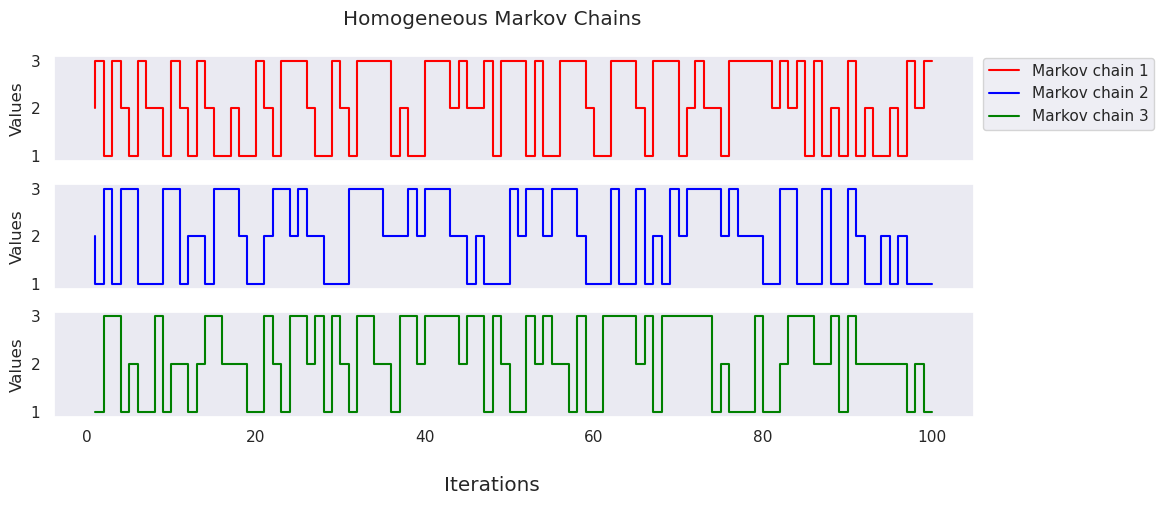

In [ ]:
A = np.array([[0.35, 0.25, 0.4],
              [0.5, 0.2, 0.3],
              [0.2, 0.35, 0.45]])
A2 = np.array([[0.2, 0.15, 0.65],
              [0.45, 0.10, 0.45],
              [0.5, 0.3, 0.2]])
A3 = np.array([[0.4, 0.4, 0.2],
              [0.55, 0.1, 0.35],
              [0.3, 0.25, 0.45]])

rng = np.random.default_rng(123)
rho = np.array([0.23, 0.37, 0.4])
nmax=100
chain=[markov(rho, A, nmax, rng) for rng in [np.random.default_rng(i) for i in range(1,4)]]

# Plotting the trajectories of markov chains
fig,axs = plt.subplots(3,figsize=(10,5),sharex=True)
for i, ax in enumerate(axs.flat):
  ax.step(np.arange(1,nmax+1),chain[i],c=['red','blue','green'][i],label=f'Markov chain {i+1}')
  ax.set_ylabel('Values')
fig.supxlabel('Iterations')
fig.legend(bbox_to_anchor=(1.17,0.9))
fig.suptitle('Homogeneous Markov Chains')
fig.tight_layout()


3. Explore the potential of the [`multiprocessing` package](https://docs.python.org/3/library/multiprocessing.html) to simulate several Markov chains in parallel.

> Hint: the `mutiprocessing.Pool.starmap` or `mutiprocessing.Pool.starmap_async` methods could be useful.

Your answers(s)

In [334]:
%%timeit
import multiprocessing as mp 

with mp.Pool(3) as p:
  res=p.starmap_async(markov,[(rho,A,nmax,np.random.default_rng(618))]*1000)

54.3 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [335]:
%%timeit
import multiprocessing as mp 

with mp.Pool(3) as p:
  res=p.starmap(markov,[(rho,A,nmax,np.random.default_rng(618))]*1000)

495 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [326]:
%%timeit
for i in range(1000):
  markov(rho,A,nmax,np.random.default_rng(618))

1.21 s ± 57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<div style="border-left:4px solid #2b90d9;padding:12px;background:#a32e26
;border-radius:6px;">
  <strong>Result comment</strong>

  <em>Key observations:</em>
  <ul>
    <li>Asynchronous multiprocessing gives us the best result, this is because every process can run simultaneously, meaning that tasks running inside each process don't block each other and work independently</li>
    <li>Synchronous multiprocessing gives us a better result than running everything in a single process because we can run multiple tasks at the same time in different processes but this is not as fast as asynchronous multiprocessing since each task needs to be completed for the next one to start.</li>
    <li>When we have a lot of computations to run, multiprocessing allows us to speed up significantly the execution time</li>
  </ul>
</div>


4. [Bonus] Generate Markov chains in parallel with the [`dask`](https://docs.dask.org/en/latest/futures.html) library, which offers more general parallelization functionalities (with, for instance, the use of [`Futures`](https://docs.dask.org/en/stable/futures.html), see tutorial [here](https://tutorial.dask.org/05_futures.html)). A useful example is provided [here](https://stackoverflow.com/questions/41471248/how-to-efficiently-submit-tasks-with-large-arguments-in-dask-distributed). Note that `dask` is much more versatile and powerful than `multiprocessing`, and can be useful to scale algorithms over multiple cores and/or computing nodes.

Your answers(s)

In [ ]:
# your code

## <a name="bonus">Bonus: Parallel computing with Dask</a> [(&#8593;)](#content)

1. Take a look at the [`dask.array` documentation](https://docs.dask.org/en/stable/array-best-practices.html) and the associate [tutorial](https://tutorial.dask.org/02_array.html). Apply some of the functions introduced herein and in the [documentation](https://docs.dask.org/en/stable/array-best-practices.html) to parallelize the computation of the total variation investigated during session 2. Note that you can combine `dask` and `numba` to obtain an overall more efficient implementation. Note that timing can be worse than Numpy (`dask.array` is more specifically interesting when the data do no fit in memory).

2. Take a look at the [`dask.delayed` tutorial](https://tutorial.dask.org/03_dask.delayed.html), and go through some of the examples provided. [Best practices with the `dask.delayed` interface](https://docs.dask.org/en/stable/delayed-best-practices.html) are summarized in the documentation.

> **Remark**: an alternative to Dask: the [Ray](https://docs.ray.io/en/latest/) library.

Your answers(s)

In [ ]:
# your code